In [1]:
import pickle

#load the data
df_test = pickle.load(open("../Dataset/Long_Method_test_set.pickle", 'rb'))
y_test = pickle.load(open("../Dataset/Long_Method_test_set_y.pickle", 'rb'))

df_train = pickle.load(open("../Dataset/Long_Method_train_set.pickle", 'rb'))
y_train = pickle.load(open("../Dataset/Long_Method_train_set_y.pickle", 'rb'))

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

col_names = col_names = ['CYCLO','CYCLO_SWITCH','MLOC','MELOC','NOP','NOLV','NOTC','MNOL','MNOR','MNOC','MNOA','NONL','NOSL','NOMO','NOPE','NOLE','MMNB','NOUW']
features = df_train[col_names]


ct = ColumnTransformer([
        ('somename', StandardScaler(), ['CYCLO','CYCLO_SWITCH','MLOC','MELOC','NOP','NOLV','NOTC','MNOL','MNOR','MNOC','MNOA','NONL','NOSL','NOMO','NOPE','NOLE','MMNB','NOUW'])
    ], remainder='passthrough')

sc = ct.fit(features)
X_train = sc.transform(features)

features_test = df_test[col_names]

X_test= sc.transform(features_test)

In [3]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
)

model.fit(
    X_train, y_train,
    verbose=False
)

In [4]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       384
           1       0.92      0.83      0.87       131

    accuracy                           0.94       515
   macro avg       0.93      0.90      0.92       515
weighted avg       0.94      0.94      0.94       515



In [5]:
from importlib_metadata import version
print(version('catboost'))

0.26.1


In [6]:
print(model.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 100, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Logloss', 'learning_rate': 0.10000000149011612, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_estimation_iterations': 1, 'b

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(12,12))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

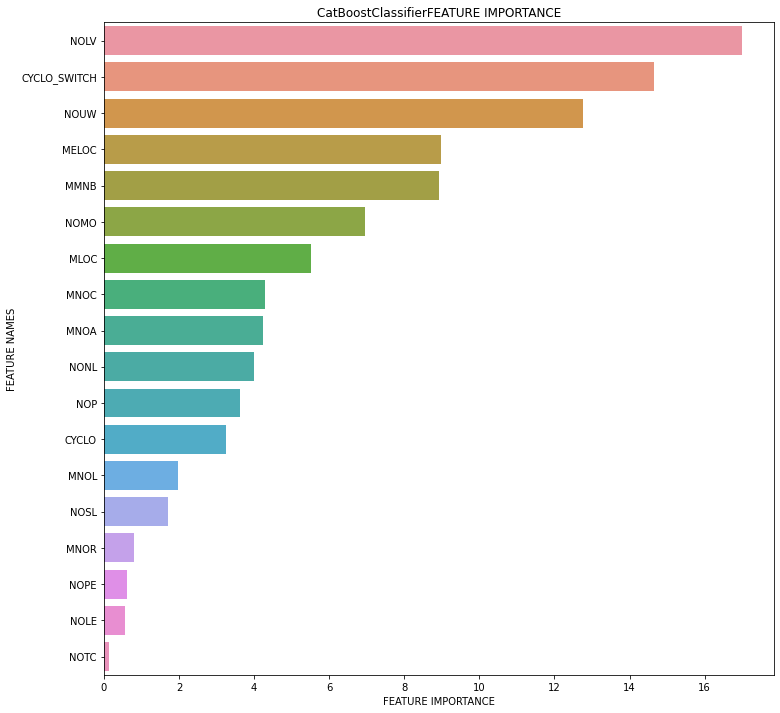

In [8]:
feature_importances = model.feature_importances_
plot_feature_importance(feature_importances,col_names,'CatBoostClassifier')